In [1]:
from pathlib import Path
from retinaface import RetinaFace
from tensorflow import keras

In [2]:
from matplotlib import pyplot as plt

In [3]:
import sys

In [4]:
import numpy as np

In [5]:
from keras_vggface.utils import preprocess_input

In [6]:
sys.path.append("../recognition/")

In [7]:
from crop import CustomCrop

In [8]:
EXPECTED_SIZE = (224, 224)
GIRLS = ('noam', 'shira', 'other')

In [9]:
model = keras.models.load_model('vgg/trained_vgg_on_girls/')

In [10]:
test_img = "../images/test/IMG_20191102_170301.jpg"

In [11]:
detected_faces_desc = RetinaFace.detect_faces(str(test_img))

In [12]:
detected_faces_desc

{'face_1': {'score': 0.9995328187942505,
  'facial_area': [921, 718, 1322, 1224],
  'landmarks': {'right_eye': [1084.1367, 902.46545],
   'left_eye': [1258.0315, 923.32446],
   'nose': [1192.6954, 1009.0002],
   'mouth_right': [1081.4352, 1085.3748],
   'mouth_left': [1232.1718, 1102.2657]}},
 'face_2': {'score': 0.999062716960907,
  'facial_area': [1933, 760, 2232, 1192],
  'landmarks': {'right_eye': [2038.38, 923.8178],
   'left_eye': [2180.6777, 938.2566],
   'nose': [2118.9148, 1019.1121],
   'mouth_right': [2023.5122, 1065.4652],
   'mouth_left': [2160.6746, 1078.7738]}},
 'face_3': {'score': 0.9988642930984497,
  'facial_area': [2280, 1503, 2482, 1744],
  'landmarks': {'right_eye': [2309.7874, 1612.5006],
   'left_eye': [2391.4104, 1597.4791],
   'nose': [2343.434, 1659.8652],
   'mouth_right': [2342.8887, 1703.7233],
   'mouth_left': [2398.9238, 1690.9642]}},
 'face_4': {'score': 0.9978220462799072,
  'facial_area': [2628, 1413, 2824, 1648],
  'landmarks': {'right_eye': [2659.25

In [13]:
face1_roi = detected_faces_desc['face_1']['facial_area']

In [14]:
faces = np.array([CustomCrop(width=EXPECTED_SIZE[0], height=EXPECTED_SIZE[1], face_percent=80).crop(str(test_img), *face['facial_area']) for face in detected_faces_desc.values()], dtype=np.float32)

In [15]:
samples = preprocess_input(faces, version=2)

In [16]:
results = model.predict(samples)

1/1 [==============================] - 1s 756ms/step


In [17]:
results

array([[2.9687489e-11, 2.6316798e-27, 1.0000000e+00],
       [1.6098350e-22, 1.3548508e-31, 1.0000000e+00],
       [9.9999964e-01, 7.7442626e-20, 3.5345823e-07],
       [8.8545446e-23, 1.0000000e+00, 5.2236343e-17],
       [3.1900066e-22, 1.1307209e-24, 1.0000000e+00]], dtype=float32)

In [18]:
descriptive_results = [(GIRLS[np.argmax(r)], max(r)) for r in results]

In [19]:
descriptive_results

[('other', 1.0),
 ('other', 1.0),
 ('noam', 0.99999964),
 ('shira', 1.0),
 ('other', 1.0)]

In [20]:
results

array([[2.9687489e-11, 2.6316798e-27, 1.0000000e+00],
       [1.6098350e-22, 1.3548508e-31, 1.0000000e+00],
       [9.9999964e-01, 7.7442626e-20, 3.5345823e-07],
       [8.8545446e-23, 1.0000000e+00, 5.2236343e-17],
       [3.1900066e-22, 1.1307209e-24, 1.0000000e+00]], dtype=float32)

IndexError: index 5 is out of bounds for axis 0 with size 5

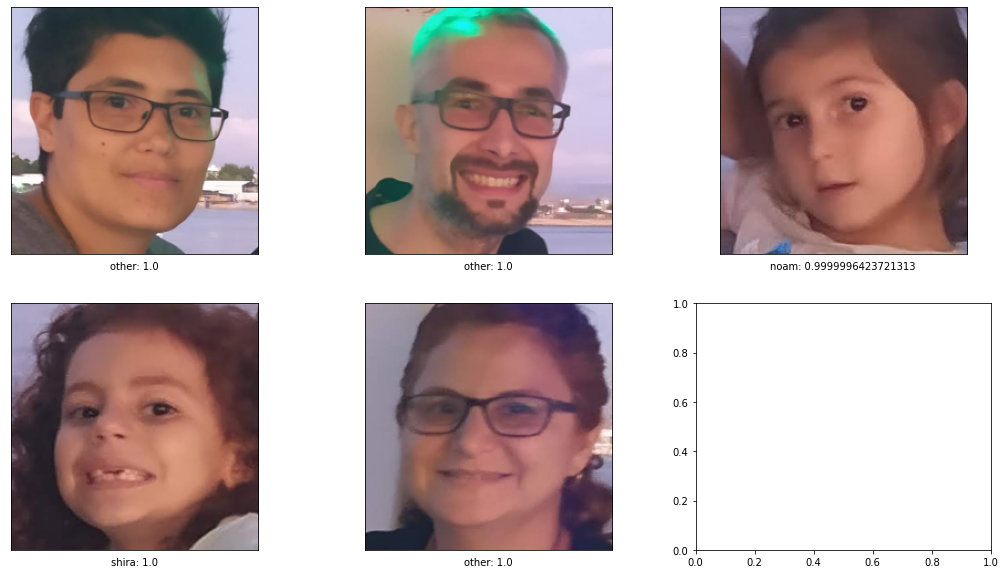

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
 
for i, axi in enumerate(ax.flat):
    axi.imshow(faces[i] / 255) # Scale pixel values so Matplotlib doesn't clip everything above 1.0
    axi.set(xticks=[], yticks=[], xlabel=f"{descriptive_results[i][0]}: {descriptive_results[i][1]}")